In [217]:
import pandas as pd #для создания датафреймов
import requests #для сбора html со страницы
from bs4 import BeautifulSoup #для преобразования html страницы в читаемый вид
from selenium import webdriver #запуск браузера для эмуляции пользователя
from selenium.webdriver.common.by import By #для удобного поиска элементов на странице
from selenium.webdriver.common.keys import Keys #для ввода запросов в поисковую строку
from selenium.webdriver.support.ui import WebDriverWait #для ожидания загрузки нужного элемента
from selenium.webdriver.support import expected_conditions as EC #для проверки, что нужный элемент прогрузился на странице
import time #для избежания блокировки
import matplotlib.pyplot as plt #для построения графиков
import plotly.graph_objects as fr #для построения красивых графиков
from wordcloud import WordCloud #для построения облака слова
from nltk.sentiment import SentimentIntensityAnalyzer #позволяет оценить тональность сообщений

In [224]:
link = 'https://rosstat.gov.ru'
def getting_link(first_link):
    html = requests.get(first_link) 
    soup = BeautifulSoup(html.text)
    a = soup.find('a', {"href": "https://rosstat.gov.ru/folder/10705"}).get('href')
    return a
#берем изначальную ссылку и достаем ссылку на вкладку 'Официальная статистика'

In [225]:
def returning_population_folder(topic):
    a = getting_link(link)
    html = requests.get(a)
    soup = BeautifulSoup(html.text)
    b = soup.find_all('a', string=topic)[0].get('href')
    return b
#достаем ссылку на вкладку 'Население'

In [226]:
def returning_list_of_links(topic):
    a = returning_population_folder('Население')
    html = requests.get(a)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', string=topic).get('href')
    return b
#функция достает ссылку на нужную вкладку из списка
list_of_topics = ['Уровень жизни', 'Семья, материнство и детство', 'Здравоохранение', 'Положение инвалидов'] #список названий вкладок
spisok = [] #список в который мы будем записывать ссылки на вкладки которые мы дали коду

try:
    for topic in list_of_topics:
        spisok.append(returning_list_of_links(topic))
        time.sleep(3)
        #применяет функцию ко всем названиям вкладок которые мы предложили
#Эта часть кода может не работать из за проблем со стороны росстата, поэтому был применен метод try/except (список ссылок был собран не руками)
except:
    spisok = ['https://rosstat.gov.ru/folder/13397', 'https://rosstat.gov.ru/folder/13807', 'https://rosstat.gov.ru/folder/13721', 'https://rosstat.gov.ru/folder/13964']



ConnectTimeout: HTTPSConnectionPool(host='rosstat.gov.ru', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x33ba4ee90>, 'Connection to rosstat.gov.ru timed out. (connect timeout=None)'))

In [238]:
required_link = spisok[0] 
def returning_xlsx_file(required_link):
    html = requests.get(required_link)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', {'href' : "/storage/mediabank/urov_06-11.xlsx"}).get('href') 
    return link+b                
#эта функция возвращает ссылку на файл

In [240]:
a = returning_xlsx_file(required_link) #сохраняем в переменную ссылку на файл
if a.endswith('xlsx'):
    df = pd.read_excel(a, engine='openpyxl')
elif a.endswith('xls'):
    df = pd.read_excel(a, engine='xlrd')
elif a.endswith('csv'):
    df = pd.read_csv(a)
#проверяем тип файла и записываем его в датафрейм

In [241]:
print("Размер ежемесячного пособия на ребенка в зависимости от категорий семей получателей по субъектам Российской Федерации:")
rename_dict = {'Размер ежемесячного пособия на ребенка в зависимости от категорий семей получателей по субъектам Российской Федерации':'Субъект', 'Unnamed: 1':'Базовый.2020г', 'Unnamed: 2':'Базовый.2021г.', 'Unnamed: 3':'Базовый.2022г.', 'Unnamed: 4':'2020.На одиноких матерей', 'Unnamed: 5':'2021.На одиноких матерей', 'Unnamed: 6':'2022.На одиноких матерей', 'Unnamed: 7':'2020.На детей военнослужающих по призыву', 'Unnamed: 8':'2021.На детей военнослужающих по призыву', 'Unnamed: 9':'2022.На детей военнослужающих по призыву', 'Unnamed: 10':'2020.На детей, родители которых уклоняются от уплаты алиментов', 'Unnamed: 11':'2021.На детей, родители которых уклоняются от уплаты алиментов', 'Unnamed: 12':'2022.На детей, родители которых уклоняются от уплаты алиментов'}
df.rename(columns=rename_dict, inplace=True )
df = df[5:-8]
df

Размер ежемесячного пособия на ребенка в зависимости от категорий семей получателей по субъектам Российской Федерации:


,Субъект,Базовый.2020г,Базовый.2021г.,Базовый.2022г.,2020.На одиноких матерей,2021.На одиноких матерей,2022.На одиноких матерей,2020.На детей военнослужающих по призыву,2021.На детей военнослужающих по призыву,2022.На детей военнослужающих по призыву,"2020.На детей, родители которых уклоняются от уплаты алиментов","2021.На детей, родители которых уклоняются от уплаты алиментов","2022.На детей, родители которых уклоняются от уплаты алиментов"
5,Белгородская область,311,388,388,623,775,775,698,869,869,1375,1711,1711
6,Брянская область,335,349,349,670,698,698,502,524,524,502,524,524
7,Владимирская область,473,492,536,946,984,10272,710,738,804,710,738,804
8,Воронежская область,302,313,331,603,626,663,452,470,497,452,470,497
9,Ивановская область,270,281,295,540,561,591,405,421,443,405,421,443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Амурская область,294,294,305,588,588,610,441,441,458,441,441,458
93,Магаданская область1),600-1200,622-1244,712-1424,1800-3600,1867-3733,2135-4271,900-1800,933-1867,1068-2135,900-1800,933-1867,1068-2135
94,Сахалинская область,457,474,493,1826,1894,1969,685,711,740,685,711,740
95,Еврейская автономная область,120,120,120,240,240,240,240,240,240,180,180,180


In [242]:
# сделали дф, в котором значения выплат по месяцам умножены на 12, чтобы получить сумму годовой выплаты

monthly_columns = ['Базовый.2020г', 'Базовый.2021г.', 'Базовый.2022г.',
        '2020.На одиноких матерей', '2021.На одиноких матерей', '2022.На одиноких матерей',
        '2020.На детей военнослужающих по призыву', '2021.На детей военнослужающих по призыву', '2022.На детей военнослужающих по призыву',
        '2020.На детей, родители которых уклоняются от уплаты алиментов', '2021.На детей, родители которых уклоняются от уплаты алиментов', '2022.На детей, родители которых уклоняются от уплаты алиментов']


def clean_and_convert(value):
    if isinstance(value, str):
        value = value.replace('-', ';') 
        parts = value.split(';')
        if len(parts) == 2 and all(part.replace('.', '', 1).isdigit() for part in parts):
            return (int(parts[0]) + int(parts[1])) // 2  
        elif all(part.replace('.', '', 1).isdigit() for part in parts):
            return int(value)
    elif isinstance(value, int):
        return value

for column in monthly_columns:
    df[column] = df[column].apply(clean_and_convert)
new_df = df.copy()
for column in monthly_columns:
    new_df[column + ' Ежегодная выплата'] = new_df[column] * 12
    

new_df

,Субъект,Базовый.2020г,Базовый.2021г.,Базовый.2022г.,2020.На одиноких матерей,2021.На одиноких матерей,2022.На одиноких матерей,2020.На детей военнослужающих по призыву,2021.На детей военнослужающих по призыву,2022.На детей военнослужающих по призыву,...,Базовый.2022г. Ежегодная выплата,2020.На одиноких матерей Ежегодная выплата,2021.На одиноких матерей Ежегодная выплата,2022.На одиноких матерей Ежегодная выплата,2020.На детей военнослужающих по призыву Ежегодная выплата,2021.На детей военнослужающих по призыву Ежегодная выплата,2022.На детей военнослужающих по призыву Ежегодная выплата,"2020.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата","2021.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата","2022.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата"
5,Белгородская область,311.0,388.0,388.0,623.0,775.0,775.0,698.0,869.0,869.0,...,4656.0,7476.0,9300.0,9300.0,8376.0,10428.0,10428.0,16500.0,20532.0,20532.0
6,Брянская область,335.0,349.0,349.0,670.0,698.0,698.0,502.0,524.0,524.0,...,4188.0,8040.0,8376.0,8376.0,6024.0,6288.0,6288.0,6024.0,6288.0,6288.0
7,Владимирская область,473.0,492.0,536.0,946.0,984.0,10272.0,710.0,738.0,804.0,...,6432.0,11352.0,11808.0,123264.0,8520.0,8856.0,9648.0,8520.0,8856.0,9648.0
8,Воронежская область,302.0,313.0,331.0,603.0,626.0,663.0,452.0,470.0,497.0,...,3972.0,7236.0,7512.0,7956.0,5424.0,5640.0,5964.0,5424.0,5640.0,5964.0
9,Ивановская область,270.0,281.0,295.0,540.0,561.0,591.0,405.0,421.0,443.0,...,3540.0,6480.0,6732.0,7092.0,4860.0,5052.0,5316.0,4860.0,5052.0,5316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Амурская область,294.0,294.0,305.0,588.0,588.0,610.0,441.0,441.0,458.0,...,3660.0,7056.0,7056.0,7320.0,5292.0,5292.0,5496.0,5292.0,5292.0,5496.0
93,Магаданская область1),900.0,933.0,1068.0,2700.0,2800.0,3203.0,1350.0,1400.0,1601.0,...,12816.0,32400.0,33600.0,38436.0,16200.0,16800.0,19212.0,16200.0,16800.0,19212.0
94,Сахалинская область,457.0,474.0,493.0,1826.0,1894.0,1969.0,685.0,711.0,740.0,...,5916.0,21912.0,22728.0,23628.0,8220.0,8532.0,8880.0,8220.0,8532.0,8880.0
95,Еврейская автономная область,120.0,120.0,120.0,240.0,240.0,240.0,240.0,240.0,240.0,...,1440.0,2880.0,2880.0,2880.0,2880.0,2880.0,2880.0,2160.0,2160.0,2160.0


In [243]:
#оставляем только годовые выплаты
new_df_clean = new_df.copy()
new_df_clean = new_df_clean[['Субъект', 'Базовый.2020г Ежегодная выплата', 'Базовый.2021г. Ежегодная выплата', 'Базовый.2022г. Ежегодная выплата', '2020.На одиноких матерей Ежегодная выплата','2021.На одиноких матерей Ежегодная выплата', '2022.На одиноких матерей Ежегодная выплата', '2020.На детей военнослужающих по призыву Ежегодная выплата','2021.На детей военнослужающих по призыву Ежегодная выплата', '2022.На детей военнослужающих по призыву Ежегодная выплата', '2020.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата','2021.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата', '2022.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата']]
#список выше собран благодаря методу .columns
new_df_clean        

,Субъект,Базовый.2020г Ежегодная выплата,Базовый.2021г. Ежегодная выплата,Базовый.2022г. Ежегодная выплата,2020.На одиноких матерей Ежегодная выплата,2021.На одиноких матерей Ежегодная выплата,2022.На одиноких матерей Ежегодная выплата,2020.На детей военнослужающих по призыву Ежегодная выплата,2021.На детей военнослужающих по призыву Ежегодная выплата,2022.На детей военнослужающих по призыву Ежегодная выплата,"2020.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата","2021.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата","2022.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата"
5,Белгородская область,3732.0,4656.0,4656.0,7476.0,9300.0,9300.0,8376.0,10428.0,10428.0,16500.0,20532.0,20532.0
6,Брянская область,4020.0,4188.0,4188.0,8040.0,8376.0,8376.0,6024.0,6288.0,6288.0,6024.0,6288.0,6288.0
7,Владимирская область,5676.0,5904.0,6432.0,11352.0,11808.0,123264.0,8520.0,8856.0,9648.0,8520.0,8856.0,9648.0
8,Воронежская область,3624.0,3756.0,3972.0,7236.0,7512.0,7956.0,5424.0,5640.0,5964.0,5424.0,5640.0,5964.0
9,Ивановская область,3240.0,3372.0,3540.0,6480.0,6732.0,7092.0,4860.0,5052.0,5316.0,4860.0,5052.0,5316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Амурская область,3528.0,3528.0,3660.0,7056.0,7056.0,7320.0,5292.0,5292.0,5496.0,5292.0,5292.0,5496.0
93,Магаданская область1),10800.0,11196.0,12816.0,32400.0,33600.0,38436.0,16200.0,16800.0,19212.0,16200.0,16800.0,19212.0
94,Сахалинская область,5484.0,5688.0,5916.0,21912.0,22728.0,23628.0,8220.0,8532.0,8880.0,8220.0,8532.0,8880.0
95,Еврейская автономная область,1440.0,1440.0,1440.0,2880.0,2880.0,2880.0,2880.0,2880.0,2880.0,2160.0,2160.0,2160.0


In [244]:
# Далее мы хотим визуализировать данные
new_df_clean = new_df_clean.dropna() # Для начала нам необходимо избавиться от строчек с недостающей информацией (значения NaN)

In [245]:
trace_1 = fr.Scatter(x = new_df_clean['Базовый.2020г Ежегодная выплата'], 
                    y = new_df_clean['2020.На одиноких матерей Ежегодная выплата'], 
                    mode = 'markers', 
                    marker = dict(size = new_df_clean['2020.На детей военнослужающих по призыву Ежегодная выплата']//700, 
                                 color = new_df_clean['2020.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата'], 
                                 opacity = 0.7, 
                                 colorscale = 'Electric',
                                 showscale = True),
                    text = new_df_clean['Субъект'], 
                    hovertemplate = 
                    '<b>%{text}</b>' +
                    '<br>Базовая ежегодная выплата за 2020 год: %{x}' +
                    '<br>Ежегодная выплата на одиноких матерей за 2020 год: %{y}' +
                    '<br>Ежегод. выплата на детей, родители которых уклоняются от алиментов за 2020 год: %{marker.color}' +
                    '<br>Ежегод. выплата на детей военнослуж. по призыву за 2020 год: %{marker.size}',
                    name = '')
layout = fr.Layout(title = 'Размер ежемесячного пособия на ребенка в зависимости от категорий семей получателей по субъектам РФ',
                  xaxis = {'title': 'Базовая ежегодная выплата за 2020 год', 'gridwidth': 1},
                  yaxis = {'title': 'Ежегодная выплата на одиноких матерей за 2020 год', 'gridwidth': 1})

fig = fr.Figure(data = [trace_1], layout = layout)
fig

In [246]:
trace_2 = fr.Scatter(x = new_df_clean['Базовый.2021г. Ежегодная выплата'], 
                    y = new_df_clean['2021.На одиноких матерей Ежегодная выплата'], 
                    mode = 'markers', 
                    marker = dict(size = new_df_clean['2021.На детей военнослужающих по призыву Ежегодная выплата']//700, 
                                 color = new_df_clean['2021.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата'], 
                                 opacity = 0.7, 
                                 colorscale = 'Electric',
                                 showscale = True),
                    text = new_df_clean['Субъект'], 
                    hovertemplate = 
                    '<b>%{text}</b>' +
                    '<br>Базовая ежегодная выплата за 2021 год: %{x}' +
                    '<br>Ежегодная выплата на одиноких матерей за 2021 год: %{y}' +
                    '<br>Ежегод. выплата на детей, родители которых уклоняются от алиментов за 2021 год: %{marker.color}' +
                    '<br>Ежегод. выплата на детей военнослуж. по призыву за 2021 год: %{marker.size}',
                    name = '')
layout = fr.Layout(title = 'Размер ежемесячного пособия на ребенка в зависимости от категорий семей получателей по субъектам РФ',
                  xaxis = {'title': 'Базовая ежегодная выплата за 2021 год', 'gridwidth': 1},
                  yaxis = {'title': 'Ежегодная выплата на одиноких матерей за 2021 год', 'gridwidth': 1})

fig = fr.Figure(data = [trace_2], layout = layout)
fig

In [247]:
trace_3 = fr.Scatter(x = new_df_clean['Базовый.2022г. Ежегодная выплата'], 
                    y = new_df_clean['2022.На одиноких матерей Ежегодная выплата'], 
                    mode = 'markers', 
                    marker = dict(size = new_df_clean['2022.На детей военнослужающих по призыву Ежегодная выплата']//700, 
                                 color = new_df_clean['2022.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата'], 
                                 opacity = 0.7, 
                                 colorscale = 'Electric',
                                 showscale = True),
                    text = new_df_clean['Субъект'], 
                    hovertemplate = 
                    '<b>%{text}</b>' +
                    '<br>Базовая ежегодная выплата за 2022 год: %{x}' +
                    '<br>Ежегодная выплата на одиноких матерей за 2022 год: %{y}' +
                    '<br>Ежегод. выплата на детей, родители которых уклоняются от алиментов за 2022 год: %{marker.color}' +
                    '<br>Ежегод. выплата на детей военнослуж. по призыву за 2022 год: %{marker.size}',
                    name = '')
layout = fr.Layout(title = 'Размер ежемесячного пособия на ребенка в зависимости от категорий семей получателей по субъектам РФ',
                  xaxis = {'title': 'Базовая ежегодная выплата за 2022 год', 'gridwidth': 1},
                  yaxis = {'title': 'Ежегодная выплата на одиноких матерей за 2022 год', 'gridwidth': 1})

fig = fr.Figure(data = [trace_3], layout = layout)
fig

In [150]:
required_link2 = spisok[1] 
def returning_xlsx_file(required_link):
    html = requests.get(required_link)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', {'href' : "/storage/mediabank/smd_4.2.xlsx"}).get('href') 
    return link+b                

In [152]:
a2 = returning_xlsx_file(required_link2)
if a2.endswith('xlsx'):
    df2 = pd.read_excel(a2, sheet_name=2, engine='openpyxl')
elif a2.endswith('xls'):
    df2 = pd.read_excel(a2, sheet_name=2, engine='xlrd')
elif a2.endswith('csv'):
    df2 = pd.read_csv(a2)

In [248]:
print("Средний размер назначенных социальных пенсий детей-инвалидов в возрасте до 18 лет:")
rename_dict = {'Unnamed: 0':'Субъект', 'Unnamed: 1':'2012г', 'Unnamed: 2':'2013', 'Unnamed: 3':'2014', 'Unnamed: 4':'2015', 'Unnamed: 5':'2016', 'Unnamed: 6':'2017. не включая единовременную денежную выплату', 'Unnamed: 7':'2017. включая единовременную денежную выплат', 'Unnamed: 8':'2018', 'Unnamed: 9':'2019', 'Unnamed: 10':'2020', 'Unnamed: 11':'2021', 'Unnamed: 12':'2022', 'Unnamed: 13':'2023', 'Unnamed: 14':'2024'}
df2.rename(columns=rename_dict, inplace=True )
df2 = df2[['Субъект', '2012г', '2013', '2014', '2015', '2016',
       '2017. не включая единовременную денежную выплату',
       '2017. включая единовременную денежную выплат', '2018', '2019', '2020',
       '2021', '2022']][7:-6]
df2

Средний размер назначенных социальных пенсий детей-инвалидов в возрасте до 18 лет:


,Субъект,2012г,2013,2014,2015,2016,2017. не включая единовременную денежную выплату,2017. включая единовременную денежную выплат,2018,2019,2020,2021,2022
14,Курская область,6357.1,7253.4,8860.9,10371.9,11445.7,11903.5,16903.5,12110.4,12432.4,12681.4,13455.0,13913.4
15,Липецкая область,6357.1,7254.3,8861.5,10376.4,11445.7,11901.7,16901.7,12070.4,12433.4,12680.6,13449.1,13913.1
16,Московская область4),6357.1,7253.4,8861.5,10376.9,11445.7,11903.5,16903.5,12137.5,12432.2,12681.2,13454.5,13912.1
17,Орловская область,6357.2,7253.2,8860.9,10352.3,11443.4,11903.5,16903.5,12070.7,12432.4,12681.1,13456.5,13914.3
18,Рязанская область,6357.1,7253.4,8861.5,10376.9,11445.7,11903.5,16903.5,12067.1,12433.1,12681.1,13454.6,13912.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Республика Бурятия,7660.6,8741.5,10679.4,12485.2,13780.2,14332.7,19332.7,14530.4,14970.3,15233.2,16198.7,16755.4
91,Республика Саха (Якутия),9454.1,10778.2,13131.1,15360.7,16899.4,17570.3,22570.3,17787.4,18344.4,18716.8,19817.0,20478.6
92,Забайкальский край,7764.1,8853.8,10811.1,12520.6,13877.4,14528.6,19528.6,14665.2,15162.1,15471.2,16402.6,16897.8
93,Камчатский край,10177.6,11611.7,14202.6,16544.4,17870.6,19050.8,24050.8,19442.6,19896.9,20293.7,21503.6,22262.4


In [154]:
required_link3 = spisok[1] 
def returning_xlsx_file(required_link):
    html = requests.get(required_link)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', {'href' : "/storage/mediabank/smd_1.7.xlsx"}).get('href') 
    return link+b               

In [155]:
a3 = returning_xlsx_file(required_link3)
if a3.endswith('xlsx'):
    df3 = pd.read_excel(a3, sheet_name=2, engine='openpyxl')
elif a3.endswith('xls'):
    df3 = pd.read_excel(a3, sheet_name=2, engine='xlrd')
elif a3.endswith('csv'):
    df3 = pd.read_csv(a3)

In [249]:
print("Численность лиц, получивших государственный сертификат на материнский (семейный) капитал:")
rename_dict = {'Unnamed: 0':'Субъект', 'Unnamed: 1':'2011', 'Unnamed: 2':'2012', 'Unnamed: 3':'2013', 'Unnamed: 4':'2014', 'Unnamed: 5':'2015', 'Unnamed: 6':'2016', 'Unnamed: 7':'2017', 'Unnamed: 8':'2018', 'Unnamed: 9':'2019', 'Unnamed: 10':'2020', 'Unnamed: 11':'2021', 'Unnamed: 12':'2022', 'Unnamed: 13':'2023'} 
df3.rename(columns=rename_dict, inplace=True )
#df3 = df3[5:-4]
df3 = df3[['Субъект', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020',
       '2021', '2022']][5:-5]
#убираем 2023 год, так как в остальных данных его нет
df3

Численность лиц, получивших государственный сертификат на материнский (семейный) капитал:


,Субъект,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
10,Калужская область,4260.0,5046.0,5167.0,6942,6885.0,5402.0,4956.0,4843.0,8364,6992,6716
11,Костромская область,3700.0,3828.0,3728.0,4401,4128.0,3206.0,3020.0,2553.0,4577,3728,3249
12,Курская область,5129.0,5739.0,5949.0,6925,6243.0,4805.0,4810.0,3990.0,8128,7106,6292
13,Липецкая область,5285.0,6139.0,6022.0,7294,7124.0,5504.0,5470.0,4839.0,8471,7036,6300
14,Орловская область,3051.0,3646.0,3760.0,4498,4015.0,3075.0,3015.0,2823.0,5366,4356,3842
...,...,...,...,...,...,...,...,...,...,...,...,...
87,Республика Саха (Якутия),7206.0,7051.0,6989.0,7947,7119.0,5445.0,5177.0,5155.0,8930,7327,6603
88,Забайкальский край,6873.0,7597.0,7654.0,10047,8122.0,5828.0,5772.0,5532.0,9996,8159,7105
89,Камчатский край,1554.0,1660.0,1713.0,2115,1941.0,1633.0,1687.0,1497.0,2885,2296,2205
90,Приморский край,9246.0,10069.0,10848.0,12999,12030.0,8929.0,9225.0,8481.0,15451,13297,11736


In [157]:
df3_clean = df3.copy()
df3_clean = df3_clean[['Субъект', '2020', '2021', '2022']]
df3_clean

,Субъект,2020,2021,2022
5,Белгородская область,12103,10358,8803
6,Брянская область,8984,7204,6256
7,Владимирская область,9937,7939,6844
8,Воронежская область,18884,15743,14207
9,Ивановская область,6856,5723,5245
...,...,...,...,...
92,Амурская область,7199,5510,5075
93,Магаданская область,1234,899,906
94,Сахалинская область,4407,3730,3363
95,Еврейская автономная область,…,…,…


In [158]:
required_link4 = spisok[1] 
def returning_xlsx_file(required_link):
    html = requests.get(required_link)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', {'href' : "/storage/mediabank/Smd_7-30.xls"}).get('href') 
    return link+b       

In [160]:
a4 = returning_xlsx_file(required_link4)
if a4.endswith('xlsx'):
    df4 = pd.read_excel(a4, sheet_name=2, engine='openpyxl')
elif a4.endswith('xls'):
    df4 = pd.read_excel(a4, sheet_name=2, engine='xlrd')
elif a4.endswith('csv'):
    df4 = pd.read_csv(a4)

In [250]:
print("Число многодетных семей, состоящих на учете в качестве нуждающихся в жилых помещениях и улучшивших жилищные условия в отчетном году:")
rename_dict = {'К содержанию':'Субъект', 'Unnamed: 1':'2011', 'Unnamed: 2':'2012', 'Unnamed: 3':'2013', 'Unnamed: 4':'2014', 'Unnamed: 5':'2015', 'Unnamed: 6':'2016', 'Unnamed: 7':'2017', 'Unnamed: 8':'2018', 'Unnamed: 9':'2019', 'Unnamed: 10':'2020', 'Unnamed: 11':'2021', 'Unnamed: 12':'2022', 'Unnamed: 13':'2023'} 
df4.rename(columns=rename_dict, inplace=True )
#df4 = df4[6:-2]
df4 = df4[['Субъект', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020',
       '2021', '2022']][6:-2]
df4

Число многодетных семей, состоящих на учете в качестве нуждающихся в жилых помещениях и улучшивших жилищные условия в отчетном году:


,Субъект,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
12,Костромская область,177,172,186,138,94,86,65,64,56,54,66
13,Курская область,23,28,27,18,21,19,17,11,5,5,6
14,Липецкая область,15,20,26,32,39,32,16,65,39,48,31
15,Московская область,138,154,71,79,57,36,51,46,29,53,37
16,Орловская область,21,32,26,25,23,5,18,6,9,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Приморский край,60,71,24,36,32,41,52,108,60,50,34
96,Хабаровский край,59,60,34,65,40,44,64,48,18,31,34
97,Амурская область,167,282,200,258,182,91,58,168,45,65,17
98,Магаданская область,6,4,5,5,11,2,5,5,10,5,7


In [258]:
required_link5 = spisok[2] 
def returning_xlsx_file(required_link):
    html = requests.get(required_link)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', {'href' : "/storage/mediabank/Zdr3-1.xls"}).get('href') 
    return link+b               

In [260]:
a5 = returning_xlsx_file(required_link5)
if a5.endswith('xlsx'):
    df5 = pd.read_excel(a5, engine='openpyxl')
elif a5.endswith('xls'):
    df5 = pd.read_excel(a5, engine='xlrd')
elif a5.endswith('csv'):
    df5 = pd.read_csv(a5)

In [261]:
print("Медицинская помощь женщинам и детям:")
rename_dict = {'Unnamed: 0':'Год', 'Unnamed: 1':'Число коек для беременных женщин, рожениц и родильниц', 'Unnamed: 2':'Число коек для детей.Всего тыс', 'Unnamed: 3':'Число коек для детей на каждые 10 000 ', 'Unnamed: 4':'Число женских консультаций, акушерско-гинекологических отделений (кабинетов), детских поликлиник,  отделений (кабинетов), тыс.', 'Unnamed: 5':'Число фельдшеpско-акушеpских пунктов, тыс.'} 
df5.rename(columns=rename_dict, inplace=True )
df5 = df5[25:36]
df5

Медицинская помощь женщинам и детям:


,Год,"Число коек для беременных женщин, рожениц и родильниц",Число коек для детей.Всего тыс,Число коек для детей на каждые 10 000,"Число женских консультаций, акушерско-гинекологических отделений (кабинетов), детских поликлиник, отделений (кабинетов), тыс.","Число фельдшеpско-акушеpских пунктов, тыс."
25,2012,77.4,177.9,65.8,18.4,34.8
26,2013,74.9,173.9,63.2,17.8,34.8
27,2014,72.4,166.5,58.5,17.8,35
28,2015,69.4,163.5,56,14.3,34.3
29,2016,67,158.5,53.2,17.4,34
30,2017,64.3,158.4,52.5,18.1,33.9
31,2018,62.1,157.3,51.9,19.1,33.6
32,2019,58.9,155.5,51,20,33.6
33,2020,50.8,139.4,45.9,20.9,33.6
34,2021,50.7,142.5,47,19.9,33.6


In [262]:
trace_bunk_for_women = fr.Scatter(x = df5['Год'],
                                  y = df5['Число коек для беременных женщин, рожениц и родильниц'],
                                  marker = {'color': 'orange'},
                                  name = 'Число коек для беременных женщин, рожениц и родильниц')
trace_bunk_for_children = fr.Scatter(x = df5['Год'],
                                     y = df5['Число коек для детей на каждые 10 000 '],
                                     marker = {'color': 'crimson'},
                                     name = 'Число коек для детей на каждые 10 000')
trace_consultation_etc = fr.Scatter(x = df5['Год'],
                                    y = df5['Число женских консультаций, акушерско-гинекологических отделений (кабинетов), детских поликлиник,  отделений (кабинетов), тыс.'],
                                    marker = {'color': 'indigo'},
                                    name = 'Число женских консультаций, кабинетов и т. д.')
trace_place = fr.Scatter(x = df5['Год'],
                         y = df5['Число фельдшеpско-акушеpских пунктов, тыс.'],
                         marker = {'color': 'mediumvioletred'},
                         name = 'Число фельдшеpско-акушеpских пунктов, тыс.')
our_data = [trace_bunk_for_women, trace_bunk_for_children, trace_consultation_etc, trace_place]
layout = dict(title = 'Медицинская помощь женщинам и детям по годам',
              xaxis = {'title': 'Года'},
              yaxis = {'title': 'Кол-во'})

fig = fr.Figure(data = our_data, layout = layout)
fig

In [264]:
required_link6 = spisok[2] 
def returning_xlsx_file(required_link):
    html = requests.get(required_link)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', {'href' : "/storage/mediabank/Zdr3-2.xls"}).get('href') 
    return link+b 

In [265]:
a6 = returning_xlsx_file(required_link6)
if a6.endswith('xlsx'):
    df6 = pd.read_excel(a6, engine='openpyxl')
elif a6.endswith('xls'):
    df6 = pd.read_excel(a6, engine='xlrd')
elif a6.endswith('csv'):
    df6 = pd.read_csv(a6)

In [266]:
print("Cостояние здоровья беременных, рожениц, родильниц и новорожденных:")
rename_dict = {'Unnamed: 0':'Состояние', 'Unnamed: 15':'2011', 'Unnamed: 16':'2012', 'Unnamed: 17':'2013', 'Unnamed: 18':'2014', 'Unnamed: 19':'2015', 'Unnamed: 20':'2016', 'Unnamed: 21':'2017', 'Unnamed: 22':'2018', 'Unnamed: 23':'2019', 'Unnamed: 24':'2020', 'Unnamed: 25':'2021', 'Unnamed: 26':'2022'}
df6.rename( columns=rename_dict, inplace=True )
df6 = df6[['Состояние', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']][3:15]
df6 = df6.dropna()
df6

Cостояние здоровья беременных, рожениц, родильниц и новорожденных:


,Состояние,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,"Численность женщин, закончивших беременность,т...",1810.4,1795.0,1826.3,1817.7,1763.6,1580.1,"1495,6",1379.5,1335.4,1290.8,1197.8
5,родами в срок,1672,1649.5,1681.4,1671.9,1624.1,1450.4,"1370,2",1261.4,1220.8,1177.0,1092.2
6,преждевременными \n родами,"75,0³)",78.8,76.7,76.9,73.3,67.4,"65,9",61.7,59.9,59.5,51.5
7,абортами,"63,4³)",66.7,68.2,68.9,66.2,62.3,"59,6",56.3,54.6,54.3,54.1
9,анемией,32.7,33.1,32.0,32.6,32.7,34,"35,6",36,35.5,35.4,34.6
10,болезнями системы\n кровообращения,9.6,9.7,9.0,8.3,8,7.8,"7,6",7.4,6.6,6.2,5.9
11,сахарным диабетом,0.5,0.7,1.3,2.2,3.1,4.4,"5,8",7.2,7.8,9.0,10.4
12,"отеками, протеинурией \n и гипертензивным...",16.7,15.9,14.6,9.24),8.44),8.14),"8,14)","8,14)",7.6,7.7,7.9
13,болезнями мочеполовой \n системы,17.9,17.4,17.0,16.6,16.8,17,"16,6",16.9,16.3,15.8,16.1
14,венозными осложнениями,4.5,4.7,4.8,5.2,5.5,5.7,"5,8",6.5,6.1,6.4,6.7


In [268]:
required_link7 = spisok[3] 
def returning_xlsx_file(required_link):
    html = requests.get(required_link)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', {'href' : "/storage/mediabank/pi_8.10.xlsx"}).get('href') 
    return link+b 

In [269]:
a7 = returning_xlsx_file(required_link7)
if a7.endswith('xlsx'):
    df7 = pd.read_excel(a7, sheet_name=1, engine='openpyxl')
elif a7.endswith('xls'):
    df7 = pd.read_excel(a7, sheet_name=1, engine='xlrd')
elif a7.endswith('csv'):
    df7 = pd.read_csv(a7)

In [270]:
print("Меры социальной поддержки детей-инвалидов:")
rename_dict = {'Unnamed: 0':'Показатели', 'Unnamed: 1':'2015', 'Unnamed: 2':'2016', 'Unnamed: 3':'2017', 'Unnamed: 4':'2018', 'Unnamed: 5':'2019', 'Unnamed: 6':'2020', 'Unnamed: 7':'2021', 'Unnamed: 8':'2022', 'Unnamed: 9':'2023', 'Unnamed: 10':'2024'}
df7.rename( columns=rename_dict, inplace=True )
df7 = df7[['Показатели', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']][3:5]
df7

Меры социальной поддержки детей-инвалидов:


,Показатели,2015,2016,2017,2018,2019,2020,2021,2022
3,Средний размер назначенных пенсий детей-инвали...,11205.8,12339.0,"12837,43)",13030.8,13402.1,13675.9,14500.3,14998.4
4,Средний размер ежемесячных денежных выплат для...,1680,1765.0,2017,2002.0,2050.0,2134.0,2189.0,-


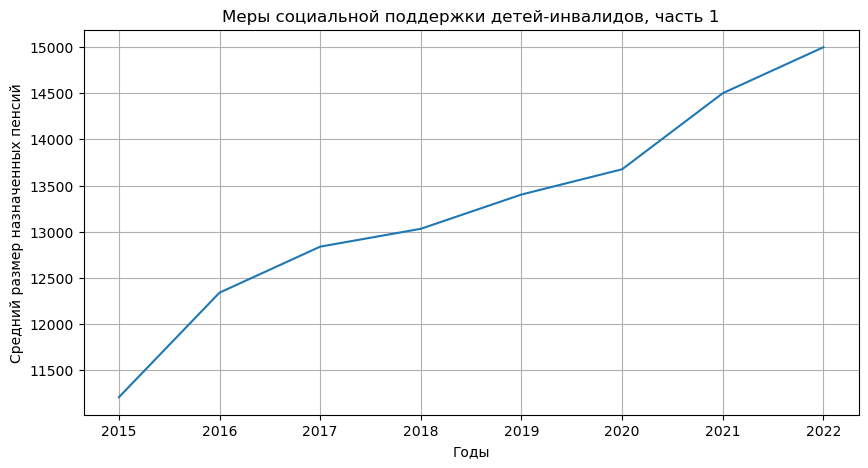

In [271]:
df71 = pd.Series({'2015': 11205.8, '2016': 12339.0, '2017': 12837.4, '2018': 13030.8, '2019': 13402.1, '2020': 13675.9, '2021': 14500.3, '2022': 14998.4})
df72 = pd.Series({'2015': 1680, '2016': 1765.0, '2017': 2017, '2018': 2002.0, '2019': 2050.0, '2020': 2134.0, '2021': 2189.0})
plt.figure(figsize = (10, 5))
plt.plot(df71)
plt.title('Меры социальной поддержки детей-инвалидов, часть 1')
plt.xlabel('Годы')
plt.ylabel('Средний размер назначенных пенсий')
plt.grid()

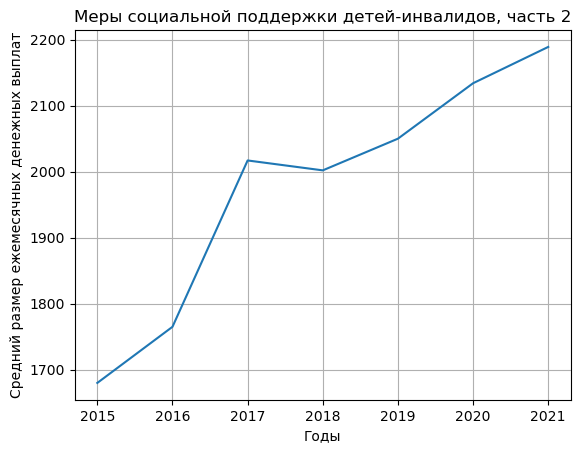

In [272]:
plt.plot(df72)
plt.title('Меры социальной поддержки детей-инвалидов, часть 2')
plt.xlabel('Годы')
plt.ylabel('Средний размер ежемесячных денежных выплат')
plt.grid()
plt.show()

In [273]:
required_link8 = spisok[1] 
def returning_xlsx_file(required_link):
    html = requests.get(required_link)
    soup = BeautifulSoup(html.text)
    b = soup.find('a', {'href' : "/storage/mediabank/smd_4.3.xls"}).get('href') 
    return link+b 

In [274]:
a8 = returning_xlsx_file(required_link8)
if a8.endswith('xlsx'):
    df8 = pd.read_excel(a8, sheet_name=0, engine='openpyxl')
elif a8.endswith('xls'):
    df8 = pd.read_excel(a8, sheet_name=0, engine='xlrd')
elif a8.endswith('csv'):
    df8 = pd.read_csv(a8)

In [275]:
print('Численность детей-инвалидов в возрасте до 18 лет, получающих ежемесячные денежные выплаты:')
rename_dict = {'Unnamed: 2':'2012', 'Unnamed: 3':'2013', 'Unnamed: 4':'2014', 'Unnamed: 5':'2015', 'Unnamed: 6':'2016', 'Unnamed: 7':'2017', 'Unnamed: 8':'2018', 'Unnamed: 9':'2019', 'Unnamed: 10':'2020', 'Unnamed: 11':'2021'}
df8.rename( columns=rename_dict, inplace=True )
df8 = df8[['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]

df8 = df8.head(4).tail(1)
df8

Численность детей-инвалидов в возрасте до 18 лет, получающих ежемесячные денежные выплаты:


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3,567 556,571 502,583 132,603 074,619 356,632 273,653 919,672 323,687 128,703 883


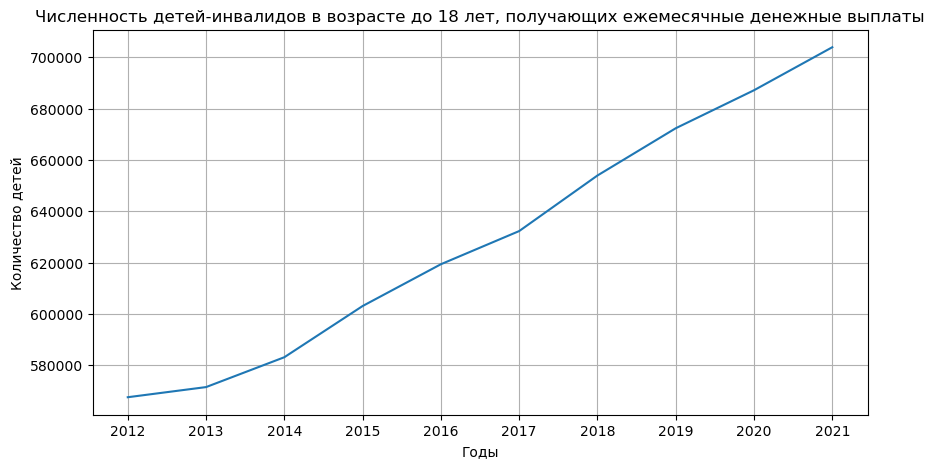

In [276]:
df81 = pd.Series({'2012': 567556, '2013': 571502, '2014': 583132, '2015': 603074, '2016': 619356, '2017': 632273, '2018': 653919, '2019': 672323, '2020': 687128, '2021': 703883})
plt.figure(figsize = (10, 5))
plt.title('Численность детей-инвалидов в возрасте до 18 лет, получающих ежемесячные денежные выплаты')
plt.xlabel('Годы')
plt.ylabel('Количество детей')
plt.grid()

plt.plot(df81)
plt.show()

In [277]:
# объединим df & df3
print('Затраты (численность мат.капиталов, размеры выплат) государства на семьи, находящихся в различных положениях :')
result = pd.concat([new_df_clean, df3_clean[['2020', '2021', '2022']]], axis=1)
rename_dict = {'2020':'Количество выплат материнского капитала в 2020 году', '2021':'Количество выплат материнского капитала в 2021 году', '2022':'Количество выплат материнского капитала в 2022 году'}
result.rename(columns=rename_dict, inplace=True )
result.dropna()

Затраты (численность мат.капиталов, размеры выплат) государства на семьи, находящихся в различных положениях :


,Субъект,Базовый.2020г Ежегодная выплата,Базовый.2021г. Ежегодная выплата,Базовый.2022г. Ежегодная выплата,2020.На одиноких матерей Ежегодная выплата,2021.На одиноких матерей Ежегодная выплата,2022.На одиноких матерей Ежегодная выплата,2020.На детей военнослужающих по призыву Ежегодная выплата,2021.На детей военнослужающих по призыву Ежегодная выплата,2022.На детей военнослужающих по призыву Ежегодная выплата,"2020.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата","2021.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата","2022.На детей, родители которых уклоняются от уплаты алиментов Ежегодная выплата",Количество выплат материнского капитала в 2020 году,Количество выплат материнского капитала в 2021 году,Количество выплат материнского капитала в 2022 году
5,Белгородская область,3732.0,4656.0,4656.0,7476.0,9300.0,9300.0,8376.0,10428.0,10428.0,16500.0,20532.0,20532.0,12103,10358,8803
6,Брянская область,4020.0,4188.0,4188.0,8040.0,8376.0,8376.0,6024.0,6288.0,6288.0,6024.0,6288.0,6288.0,8984,7204,6256
7,Владимирская область,5676.0,5904.0,6432.0,11352.0,11808.0,123264.0,8520.0,8856.0,9648.0,8520.0,8856.0,9648.0,9937,7939,6844
8,Воронежская область,3624.0,3756.0,3972.0,7236.0,7512.0,7956.0,5424.0,5640.0,5964.0,5424.0,5640.0,5964.0,18884,15743,14207
9,Ивановская область,3240.0,3372.0,3540.0,6480.0,6732.0,7092.0,4860.0,5052.0,5316.0,4860.0,5052.0,5316.0,6856,5723,5245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Приморский край,3672.0,3804.0,4128.0,11004.0,11412.0,12372.0,5508.0,5712.0,6192.0,5508.0,5712.0,6192.0,15451,13297,11736
92,Амурская область,3528.0,3528.0,3660.0,7056.0,7056.0,7320.0,5292.0,5292.0,5496.0,5292.0,5292.0,5496.0,7199,5510,5075
93,Магаданская область1),10800.0,11196.0,12816.0,32400.0,33600.0,38436.0,16200.0,16800.0,19212.0,16200.0,16800.0,19212.0,1234,899,906
94,Сахалинская область,5484.0,5688.0,5916.0,21912.0,22728.0,23628.0,8220.0,8532.0,8880.0,8220.0,8532.0,8880.0,4407,3730,3363


In [183]:
#Вторая часть кода, посвященная постам на форуме woman.ru

In [184]:
list_of_requests = ['Материнский капитал', 'Социальная поддержка', 'Обеспечение детей', 'Выплаты детям', 'Инвалидность детей', 'Медицинская помощь', 'Помощь детям', 'Помощь женщинам', 'Пособия на детей', 'Получение жилья', 'Социальная защита', 'Жилищные условия', 'Состояние здоровья']
#список запросов на форуме, нужно вписать руками
list_of_links_to_requests = []
for phrase in list_of_requests:
    driver = webdriver.Firefox() 
    driver.get('https://www.woman.ru/forum/')
    WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[3]/div[2]/div/form/div/div/input')))
    search_bar = driver.find_element(By.XPATH, '/html/body/div[3]/div[2]/div/form/div/div/input')
    search_bar.send_keys(phrase + Keys.ENTER)
    time.sleep(5)
    link = driver.current_url
    list_of_links_to_requests.append(link)
#генерация ссылок на наши запросы, запустит несколько инстантов браузера по количеству запросов
#загрузка требует определенной мощности и нескольких минут, также возможно нужно будет разрешить автоматизацию
#код на 100% работает, но снизу на всякий случай будет готовый список ссылок

In [ ]:
list_of_links_to_requests = ['https://www.woman.ru/search/?q=%D0%9C%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9+%D0%BA%D0%B0%D0%BF%D0%B8%D1%82%D0%B0%D0%BB&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%A1%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F+%D0%BF%D0%BE%D0%B4%D0%B4%D0%B5%D1%80%D0%B6%D0%BA%D0%B0&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%9E%D0%B1%D0%B5%D1%81%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5+%D0%B4%D0%B5%D1%82%D0%B5%D0%B9&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%92%D1%8B%D0%BF%D0%BB%D0%B0%D1%82%D1%8B+%D0%B4%D0%B5%D1%82%D1%8F%D0%BC&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%98%D0%BD%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%BD%D0%BE%D1%81%D1%82%D1%8C+%D0%B4%D0%B5%D1%82%D0%B5%D0%B9&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%9C%D0%B5%D0%B4%D0%B8%D1%86%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F+%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%9F%D0%BE%D0%BC%D0%BE%D1%89%D1%8C+%D0%B4%D0%B5%D1%82%D1%8F%D0%BC&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%9F%D0%BE%D0%BC%D0%BE%D1%89%D1%8C+%D0%B6%D0%B5%D0%BD%D1%89%D0%B8%D0%BD%D0%B0%D0%BC&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%9F%D0%BE%D1%81%D0%BE%D0%B1%D0%B8%D1%8F+%D0%BD%D0%B0+%D0%B4%D0%B5%D1%82%D0%B5%D0%B9&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%9F%D0%BE%D0%BB%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5+%D0%B6%D0%B8%D0%BB%D1%8C%D1%8F&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%A1%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F+%D0%B7%D0%B0%D1%89%D0%B8%D1%82%D0%B0&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%96%D0%B8%D0%BB%D0%B8%D1%89%D0%BD%D1%8B%D0%B5+%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F&where=forum&category=&sort=relevance&control_charset=0', 'https://www.woman.ru/search/?q=%D0%A1%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5+%D0%B7%D0%B4%D0%BE%D1%80%D0%BE%D0%B2%D1%8C%D1%8F&where=forum&category=&sort=relevance&control_charset=0']
#список собран полностью кодом

In [213]:
ton = {}
def getting_forum_comms(list_of_links_to_requests):
    slov = {}
    for request in list_of_links_to_requests:
        punctuation = '-,.:;?!'
        pointless = ['на','в','не','ли','с','и','или','а','за','но','из','то','для', '...', 'Или','у',
                     'по','от','это','к', 'т']
        spi = []
        html = requests.get(request) 
        soup = BeautifulSoup(html.text)
        a = soup.find_all('p', {'class': 'card__comment'})
        sia = SentimentIntensityAnalyzer()
        for i in a:
            spi.append(i.text)
            ton[i.text] = sia.polarity_scores(i.text)
        for i in spi:
            for j in punctuation:
                if i in spi:
                    i = i.replace(j, '')
            i = i.split()
            for k in i:
                if k.lower() not in slov and k.lower() not in pointless:
                    slov[k.lower()] = 1
                elif k.lower() in slov and k.lower() not in pointless:
                    slov[k.lower()] += 1
    slov = dict(sorted(slov.items(), key=lambda x: x[1], reverse=True))
    return slov
#функция которая возвращает словарь с самыми популярными словами из наших запросов   

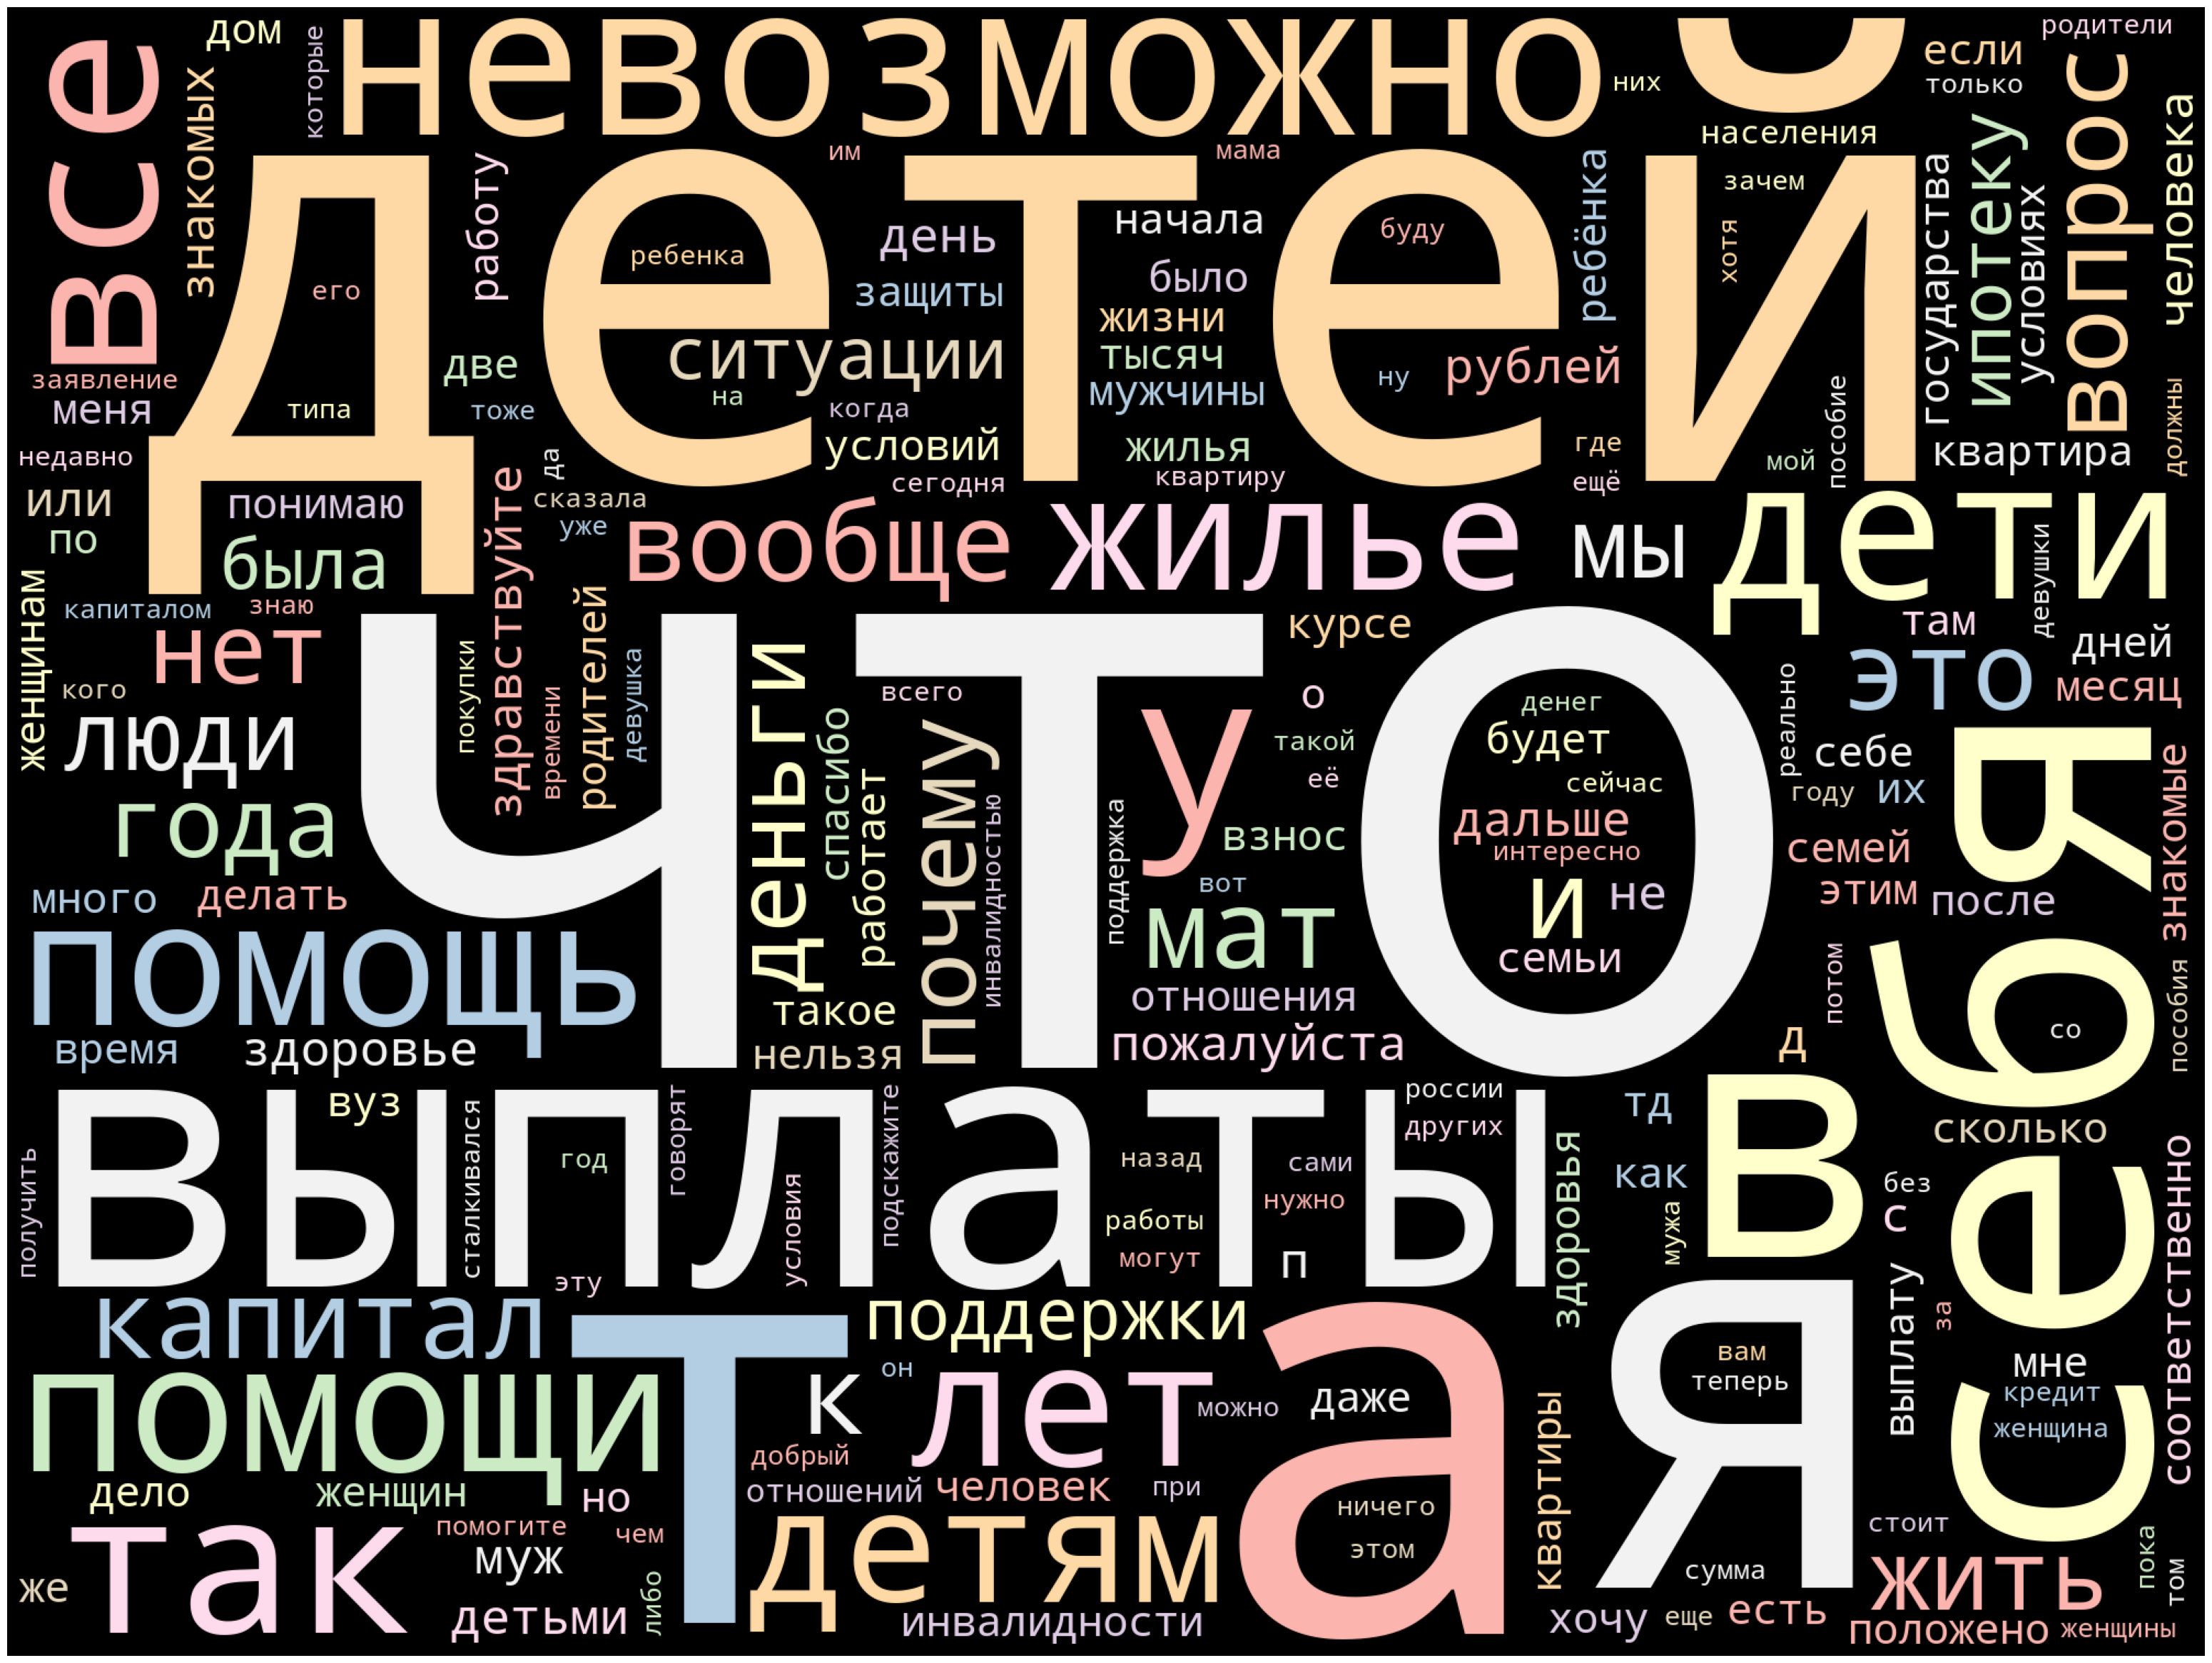

In [214]:
#создание облака слов
res = []
for k, v in getting_forum_comms(list_of_links_to_requests).items():
    res.append(k)

text = ' '.join(res)

wordcloud1 = WordCloud(width = 2000, height = 1500, random_state = 0, 
                       background_color = 'black', margin = 20, colormap = 'Pastel1',
                       collocations = False).generate(text)
def plot_cloud(wordcloud1):
    plt.figure(figsize = (40, 30))
    plt.axis('off')
    return plt.imshow(wordcloud1)

plot_cloud(wordcloud1)

In [215]:
#словарь, в котором ключ - это сообщение, а значение - оценка тональности сообщения
#библиотека nltk(в части анализа тональности) работает только на английском языке, библиотеки гугл-переводчика
#отказались работать, поэтому просим воспринимать это как задел на будущее.
for i, j in ton.items():
    print(i, j)

можно ли потратить материнский капитал на няню?платим ипотеку за квартиру, но ежемесячный ...в порядок себя привести, поесть и тд) хочется капецкапитала + моих декретных как раз хватит на няню на год ...неполную занятость) кто-то нанимал няню на мат. капитал? {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
..., не знаю что теперь делать. Отказали в получении материнского капитала по причине неверных данных (сотрудник МФЦ указал неверные данные... гражданство РФ. По закону теперь нельзя получить мат капитал. Что теперь делать? Обидно терять сертификат из за... {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
...второму ребёнку дадим русское гражданство, то можем подаваться на материнский капитал. Однако в России мы не живём, недвижимость преобретать... ли мне как-нибудь погасить их кредит своим материнским капиталом? Или кредит должен быть обязательно оформлен на... {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Материнский капитал только на 2-го ребёнка? А дальше? {'n